In [17]:
import pandas as pd
import numpy as np
import networkx as ntx
import matplotlib.pyplot as plt

# 0. 정보검색론 - 페이지랭크 맛뵈기

### 페이지 랭크란? 
   > 구글에서 검색어 순위 조정할 때 사용하는 알고리즘
   > - 페이지 랭크 값은 0~1사이의 양수 값을 가짐. 이 값이 커질수록 순위가 높아진다는 것.
   > - 타 페이지에서 해당 페이지를 얼마나 많이 링크했는지, 또는 얼마나 공신력있는 사이트(페이지 랭크가 높은 사이트)가 해당 페이지를 링크했느냐에 따라 달라짐
   > - 페이지 랭크 값은 절대 0이 나올 수 없음..아무리 링크된 적 한 번 없는 변방 웹페이지더라도 최소 0.15정도 값은 가짐.
   > - 어떤 썰에 따르면 구글에서는 한 번도 링크되지 않은 페이지는 인덱스 DB에서 삭제한다고 함(카더라)

### 페이지 랭크 공식
   > prT = (1 - d) + d * (pr1/C1 + pr2/C2 + ... + prN/CN)
   > 
   > - C는 페이지 T를 링크한 페이지가 링크한 총 링크의 개수임.
   > - d 값은 0에서 2사이의 상수값인데,0.85정도로 설정했을 때 가장 정확하다고 함.

- 각 페이지의 페이지 랭크의 평균값은 1임. 즉 N개의 페이지 노드의 연결 네트워크에서 각 노드가 갖는 페이지 랭크의 평균은 1에 근사함.


NOW TRIAL : 1
NOW page Rank A : 0.660000 
NOW page Rank B : 0.711000


NOW TRIAL : 2
NOW page Rank A : 0.754350 
NOW page Rank B : 0.791198


NOW TRIAL : 3
NOW page Rank A : 0.822518 
NOW page Rank B : 0.849140


NOW TRIAL : 4
NOW page Rank A : 0.871769 
NOW page Rank B : 0.891004


NOW TRIAL : 5
NOW page Rank A : 0.907353 
NOW page Rank B : 0.921250


NOW TRIAL : 6
NOW page Rank A : 0.933063 
NOW page Rank B : 0.943103


NOW TRIAL : 7
NOW page Rank A : 0.951638 
NOW page Rank B : 0.958892


NOW TRIAL : 8
NOW page Rank A : 0.965058 
NOW page Rank B : 0.970300


NOW TRIAL : 9
NOW page Rank A : 0.974755 
NOW page Rank B : 0.978541


NOW TRIAL : 10
NOW page Rank A : 0.981760 
NOW page Rank B : 0.984496


NOW TRIAL : 11
NOW page Rank A : 0.986822 
NOW page Rank B : 0.988798


NOW TRIAL : 12
NOW page Rank A : 0.990479 
NOW page Rank B : 0.991907


NOW TRIAL : 13
NOW page Rank A : 0.993121 
NOW page Rank B : 0.994153


NOW TRIAL : 14
NOW page Rank A : 0.995030 
NOW page Rank B : 0.995775


N

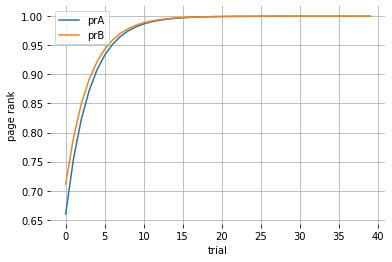

In [40]:
prA = 0.6 #페이지 A의 초기 랜덤 페이지 랭크 값
prB = 0.6 # 페이지 B의 초기 랜덤 페이지 랭크 값
d = 0.85
trial =0
Mlist = []
Nlist = []
while True:
    prA = (1-0.85) + 0.85*(prB/1)  # d값은 일반적으로 0.85가 가장 적합하다고 함
    prB = (1-0.85) + 0.85*(prA/1)
    trial += 1
    Mlist.append(prA)
    Nlist.append(prB)
    print("NOW TRIAL : %d\nNOW page Rank A : %f \nNOW page Rank B : %f\n\n" % (trial, prA, prB))
    
    if trial == 40:  # 일반적으로 20~40회정도면 페이지랭크값이 안정된다고 함(각 페이지 노드의 평균이 1)
        break
GraphD = pd.DataFrame(Mlist)
GraphD['prB'] = Nlist
GraphD.columns = ['prA','prB']

plt.plot(GraphD['prA'], label ='prA')
plt.plot(GraphD['prB'], label ='prB')

plt.xlabel('trial')
plt.ylabel('page rank')
plt.grid(True)
plt.box(False)
plt.legend()